In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

In [2]:
# membaca file 
data = pd.read_csv("F:/7_Semester/Machine Learning/projek/water_potability_clean.csv")
print(data.tail())
print(data.isnull().sum())

      index         ph    Hardness        Solids  Chloramines     Sulfate  \
2006   3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
2007   3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
2008   3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
2009   3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
2010   3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2006    390.410231        9.899115        55.069304   4.613843           1  
2007    329.266002       16.217303        28.878601   3.442983           1  
2008    439.893618       16.172755        41.558501   4.369264           1  
2009    415.886955       12.067620        60.419921   3.669712           1  
2010    526.424171       13.894419        66.687695   4.435821           1  
index              0
ph                 0
Hardness           0
Solids      

In [3]:
# Variabel independen
X = data.drop(["Potability"], axis = 1)
# Variabel dependen
Y = data["Potability"]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Gaussian

In [5]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

array([948., 660.])

In [6]:
#Predict the response for test dataset
y_pred = nbtrain.predict(x_test)
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6650124069478908


In [7]:
from sklearn.naive_bayes import BernoulliNB
modelnb_B = BernoulliNB()
nbtrain_B = modelnb_B.fit(x_train, y_train)
y_predB = nbtrain_B.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predB))

Accuracy: 0.6253101736972705


In [8]:
from sklearn.naive_bayes import MultinomialNB
modelnb_C = MultinomialNB()
nbtrain_C = modelnb_C.fit(x_train, y_train)
y_predC = nbtrain_C.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predC))

Accuracy: 0.5384615384615384


In [9]:
from sklearn.naive_bayes import ComplementNB
modelnb_D = ComplementNB()
nbtrain_D = modelnb_D.fit(x_train, y_train)
y_predD = nbtrain_D.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predD))

Accuracy: 0.5359801488833746


In [10]:
y_pred_train = nbtrain.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.6256218905472637


In [11]:
cvG5 = cross_val_score(nbtrain, x_test, y_test, cv=5)
cvG10 = cross_val_score(nbtrain, x_test, y_test, cv=10)

cvB5 = cross_val_score(nbtrain_B, x_test, y_test, cv=5)
cvB10 = cross_val_score(nbtrain_B, x_test, y_test, cv=10)

cvM5 = cross_val_score(nbtrain_C, x_test, y_test, cv=5)
cvM10 = cross_val_score(nbtrain_C, x_test, y_test, cv=10)

cvC5 = cross_val_score(nbtrain_D, x_test, y_test, cv=5)
cvC10 = cross_val_score(nbtrain_D, x_test, y_test, cv=10)


print("=================Gaussian=======================")
print("K=5 ",cvG5, "avg = ", cvG5.mean())
print("K=10 ",cvG10,"avg = ", cvG10.mean() )
print("=================Bernoulli=======================")
print("K=5 ",cvB5, "avg = ", cvB5.mean())
print("K=10 ",cvB10, "avg = ", cvG5.mean())
print("=================Multinomial=======================")
print("K=5 ",cvM5, "avg = ", cvM5.mean())
print("K=10 ",cvM10, "avg = ", cvM5.mean())
print("=================Complement=======================")
print("K=5 ",cvC5, "avg = ", cvC5.mean())
print("K=10 ",cvC10, "avg = ", cvC5.mean())


=================Gaussian=======================
K=5  [0.65432099 0.56790123 0.7037037  0.525      0.6       ] avg =  0.6101851851851852
K=10  [0.65853659 0.58536585 0.51219512 0.6        0.75       0.75
 0.6        0.55       0.55       0.65      ] avg =  0.620609756097561
=================Bernoulli=======================
K=5  [0.61728395 0.62962963 0.62962963 0.625      0.625     ] avg =  0.6253086419753087
K=10  [0.6097561  0.63414634 0.63414634 0.625      0.625      0.625
 0.625      0.625      0.625      0.625     ] avg =  0.6101851851851852
=================Multinomial=======================
K=5  [0.58024691 0.54320988 0.44444444 0.55       0.5375    ] avg =  0.5310802469135802
K=10  [0.65853659 0.48780488 0.53658537 0.575      0.4        0.475
 0.5        0.575      0.525      0.55      ] avg =  0.5310802469135802
=================Complement=======================
K=5  [0.58024691 0.54320988 0.44444444 0.55       0.5375    ] avg =  0.5310802469135802
K=10  [0.65853659 0.48780488

In [12]:
from sklearn.metrics import classification_report
print("===============classification report============")
print(classification_report(y_test, y_pred))

===============classification report============
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       252
           1       0.62      0.27      0.38       151

    accuracy                           0.67       403
   macro avg       0.65      0.59      0.57       403
weighted avg       0.65      0.67      0.62       403



In [14]:
from sklearn.metrics import classification_report
print("===============classification report============")
print(classification_report(y_test, y_predB))

===============classification report============
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       252
           1       0.00      0.00      0.00       151

    accuracy                           0.63       403
   macro avg       0.31      0.50      0.38       403
weighted avg       0.39      0.63      0.48       403



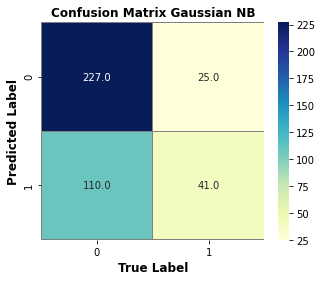

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conf_mat = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.ylabel("Predicted Label", fontsize='large', fontweight='bold')
plt.xlabel("True Label", fontsize='large', fontweight='bold')
plt.title("Confusion Matrix Gaussian NB", fontsize='large', fontweight='bold')
plt.show()
print()

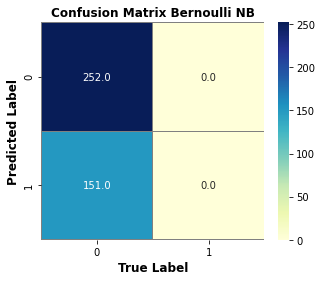

In [16]:
conf_mat2 = confusion_matrix(y_test, y_predB)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_mat2, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.ylabel("Predicted Label", fontsize='large', fontweight='bold')
plt.xlabel("True Label", fontsize='large', fontweight='bold')
plt.title("Confusion Matrix Bernoulli NB", fontsize='large', fontweight='bold')
plt.show()
print()